In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
import cv2

# import model 
import tensorflow as tf 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Directory of fruits
import os
directory_path = os.getcwd()
print("My current directory is : " + directory_path)
train_dir = directory_path + '\\inputimages\\train\\'
test_dir = directory_path + '\\inputimages\\test\\'
predict_dir = directory_path + '\\inputimages\\predict\\'

My current directory is : C:\Users\user\JupyterNotebook\projCNN


In [ ]:
# list the image file(s)
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
fruits_name = []
fruits_image = []
fruits_dir = []
for subdir in os.listdir(train_dir):
    fruits_dir.append(i) # name of the fruit
    for image_filename in os.listdir(train_dir + subdir):
        fruits_name.append(subdir) # name of the fruit 
        fruits_image.append(subdir + '/' + image_filename) # image of the fruit

In [8]:
train_fruits = pd.DataFrame(fruits_name, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image

In [ ]:
train_fruits

In [10]:
from collections import Counter
# newData is a dictionary
newData = Counter(train_fruits["Fruits"])
print("Found fruits in the data set and their corresponding count of image(s)")
# newData is dictionary
# newData2 is list of tuple 
newData2 = newData.most_common()
newData2

Found fruits in the data set and their corresponding count of image(s)


[('apple', 300),
 ('banana', 300),
 ('mango', 300),
 ('orange', 300),
 ('strawberry', 300)]

In [11]:
x,y = zip(*newData2)
x,y = list(x),list(y)
print("Found fruits in the dataset -- > \n ", x)

Found fruits in the dataset -- > 
  ['apple', 'banana', 'mango', 'orange', 'strawberry']


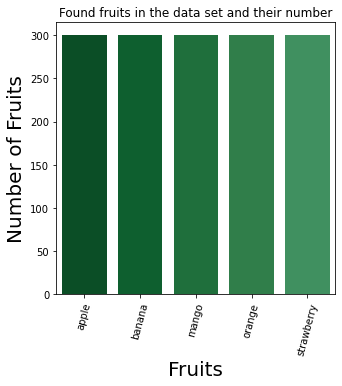

In [77]:
plt.figure(figsize=(5,5))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15)) 
plt.xlabel('Fruits', size = 20) 
plt.ylabel('Number of Fruits', size = 20 )
plt.xticks(rotation = 75)
plt.title('Found fruits in the data set and their number') 
plt.show()

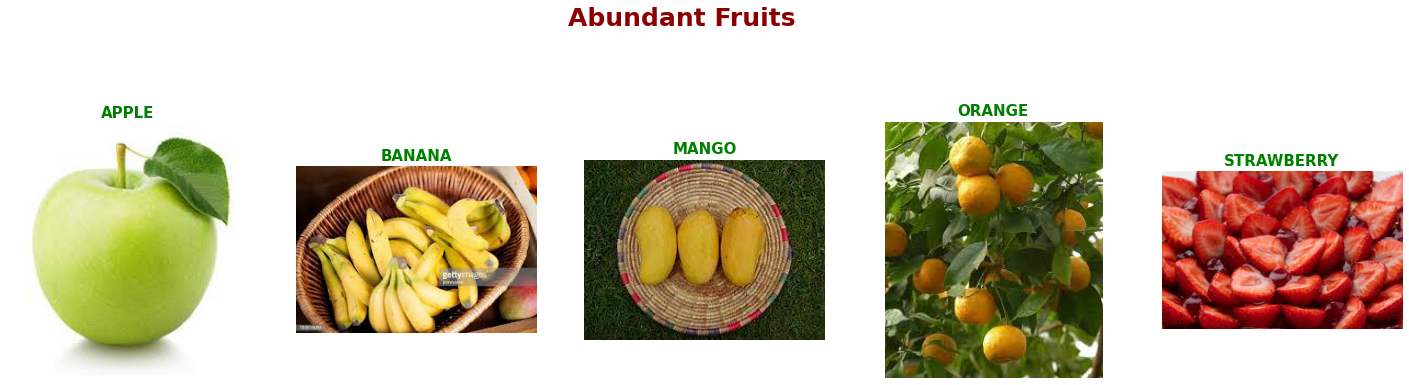

In [12]:
plt.figure(figsize=(25,16))
how_many_fruits = len(x)

for i in range(how_many_fruits):
    fruits = train_fruits[train_fruits["Fruits"] == x[i]]["Fruits Image"].values [1]
    
    plt.subplot(3,5,i+1)
    img = load_img(train_dir + fruits)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("Abundant Fruits", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

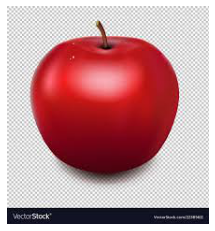

In [13]:
img = load_img(train_dir + "/apple/image_19.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [14]:
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

Image Shape -->  (233, 216, 3)


In [15]:
fruitCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fruitCountUnique)
print("How many different fruits are there  -->  ", numberOfClass)

How many different fruits are there  -->   5


In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = array_image.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

In [17]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [18]:
epochs = 100  
batch_size = 32

In [19]:
print("Target Size --> ", array_image.shape[:2])

Target Size -->  (233, 216)


In [20]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 1500 images belonging to 5 classes.


In [22]:
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 500 images belonging to 5 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print("data_batch shape --> ",data_batch.shape)
    print("labels_batch shape --> ",labels_batch.shape)
    break

data_batch shape -->  (32, 233, 216, 3)
labels_batch shape -->  (32, 5)


In [24]:
print("batch_size: " + str(batch_size))

batch_size: 32


In [25]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = (train_generator.samples) // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = (test_generator.samples) // batch_size)
model.save('model.h5')

Epoch 1/100
46/46 [==============================] - 46s 982ms/step - loss: 2.3198 - accuracy: 0.2820 - val_loss: 1.4721 - val_accuracy: 0.3208
Epoch 2/100
46/46 [==============================] - 45s 978ms/step - loss: 1.4695 - accuracy: 0.3501 - val_loss: 1.4293 - val_accuracy: 0.4313
Epoch 3/100
46/46 [==============================] - 44s 954ms/step - loss: 1.3884 - accuracy: 0.4108 - val_loss: 1.3550 - val_accuracy: 0.4313
Epoch 4/100
46/46 [==============================] - 44s 957ms/step - loss: 1.3061 - accuracy: 0.4469 - val_loss: 1.2631 - val_accuracy: 0.4792
Epoch 5/100
46/46 [==============================] - 45s 968ms/step - loss: 1.2469 - accuracy: 0.4823 - val_loss: 1.4891 - val_accuracy: 0.4375
Epoch 6/100
46/46 [==============================] - 47s 1s/step - loss: 1.2104 - accuracy: 0.5048 - val_loss: 1.2546 - val_accuracy: 0.5354
Epoch 7/100
46/46 [==============================] - 45s 960ms/step - loss: 1.1842 - accuracy: 0.5375 - val_loss: 1.1578 - val_accuracy: 0.

46/46 [==============================] - 44s 947ms/step - loss: 0.2254 - accuracy: 0.9285 - val_loss: 2.4927 - val_accuracy: 0.6229
Epoch 58/100
46/46 [==============================] - 45s 967ms/step - loss: 0.2607 - accuracy: 0.9189 - val_loss: 2.1114 - val_accuracy: 0.6396
Epoch 59/100
46/46 [==============================] - 46s 990ms/step - loss: 0.2241 - accuracy: 0.9162 - val_loss: 2.2073 - val_accuracy: 0.5813
Epoch 60/100
46/46 [==============================] - 45s 969ms/step - loss: 0.2407 - accuracy: 0.9162 - val_loss: 2.0201 - val_accuracy: 0.6542
Epoch 61/100
46/46 [==============================] - 44s 958ms/step - loss: 0.2140 - accuracy: 0.9285 - val_loss: 2.4501 - val_accuracy: 0.5854
Epoch 62/100
46/46 [==============================] - 44s 963ms/step - loss: 0.2684 - accuracy: 0.9223 - val_loss: 2.4205 - val_accuracy: 0.5854
Epoch 63/100
46/46 [==============================] - 44s 952ms/step - loss: 0.2395 - accuracy: 0.9298 - val_loss: 3.7350 - val_accuracy: 0.604

In [ ]:
hist.history.keys()

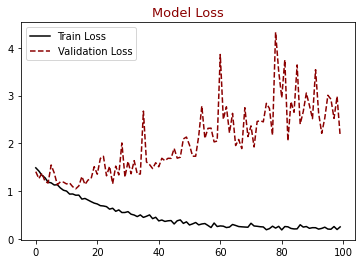

In [94]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

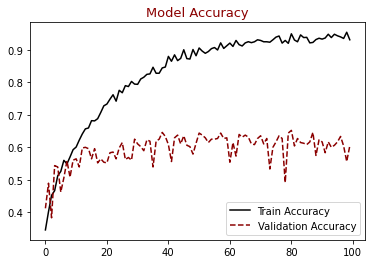

In [95]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()